In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day30-function-transformer/train.csv", usecols = ['Age', 'Fare', 'Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df['Age'].fillna(df['Age'].mean(), inplace = True)

In [5]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

C:\Users\91815\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


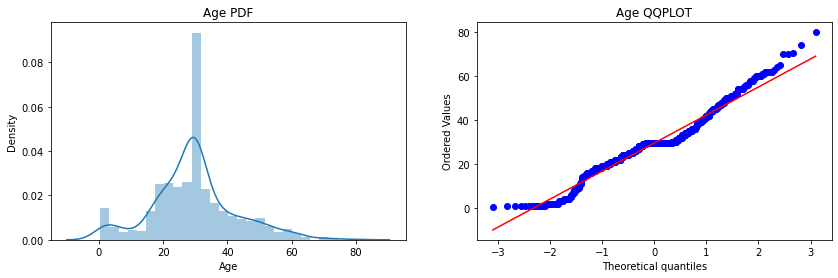

In [7]:
plt.figure(figsize = (14, 4))
plt.subplot(121)
sns.distplot(X_train["Age"])
plt.title("Age PDF")

plt.subplot(122)
stats.probplot(X_train['Age'], dist = 'norm', plot = plt)
plt.title('Age QQPLOT')

plt.show()

C:\Users\91815\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


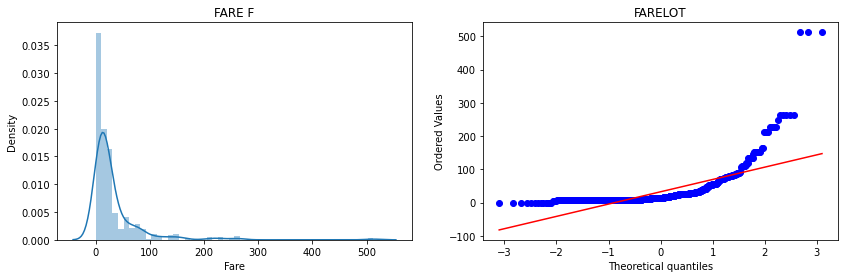

In [9]:
plt.figure(figsize = (14, 4))
plt.subplot(121)
sns.distplot(X_train["Fare"])
plt.title("FARE F")

plt.subplot(122)
stats.probplot(X_train['Fare'], dist = 'norm',plot = plt)
plt.title('FARELOT')

plt.show()

In [10]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [11]:
clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
from sklearn.metrics import accuracy_score
ypred = clf.predict(X_test)
ypred2 = clf2.predict(X_test)

print('Accuracy LR', accuracy_score(y_test, ypred))
print('Accuracy DesisionTree', accuracy_score(y_test, ypred2))

Accuracy LR 0.6480446927374302
Accuracy DesisionTree 0.6703910614525139


In [14]:
trf = FunctionTransformer(func = np.log1p)

X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

clf.fit(X_train_transformed, y_train)
clf2.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [16]:
ypredict = clf.predict(X_test_transformed)
ypredict2 = clf2.predict(X_test_transformed)

print('accuracy score : ', accuracy_score(y_test, ypredict))
print('accuracy score 2: ', accuracy_score(y_test, ypredict2))

accuracy score :  0.6815642458100558
accuracy score 2:  0.6871508379888268


In [17]:
X_transformed = trf.fit_transform(X)

print('LR', np.mean(cross_val_score(clf, X_transformed, y, scoring = 'accuracy', cv = 10)))
print('DT', np.mean(cross_val_score(clf2, X_transformed, y, scoring = 'accuracy', cv = 10)))

LR 0.678027465667915
DT 0.65438202247191


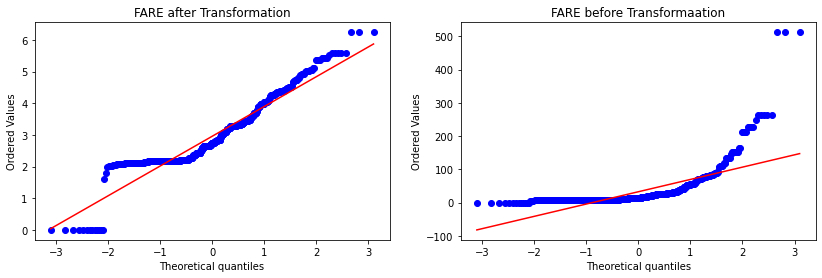

In [18]:
plt.figure(figsize = (14, 4))
plt.subplot(121)
stats.probplot(X_train_transformed['Fare'], dist = 'norm', plot = plt)
plt.title("FARE after Transformation")

plt.subplot(122)
stats.probplot(X_train['Fare'], dist = 'norm',plot = plt)
plt.title('FARE before Transformaation')

plt.show()

In [30]:
def apply_tranform(transformer):
    trf = FunctionTransformer(func = transformer)
    X_train_transformed1 = trf.fit_transform(X_train)
    X_test_transformed1 = trf.fit_transform(X_test)
    
    clf = LogisticRegression()
    clf.fit(X_train_transformed1, y_train)
    ypred = clf.predict(X_test_transformed1)
    
    print('accuracy_score:', accuracy_score(y_test, ypred))
    
    plt.figure(figsize=(14, 4))
    plt.subplot(121)
    stats.probplot(X_train['Fare'], dist='norm', plot = plt)
    plt.title("Before Transformation")
    
    plt.subplot(122)
    stats.probplot(X_train_transformed1['Fare'], dist = 'norm', plot = plt)
    plt.title("After Transformation")
    
    plt.show()

accuracy_score: 0.6815642458100558


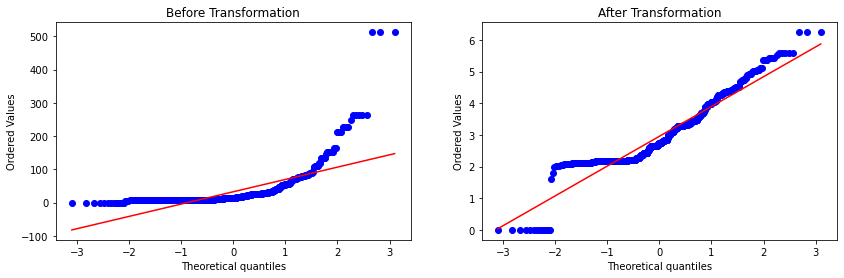

In [31]:
apply_tranform(np.log1p)